In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.api.datasets import mnist
from keras.api.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 27s 2us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

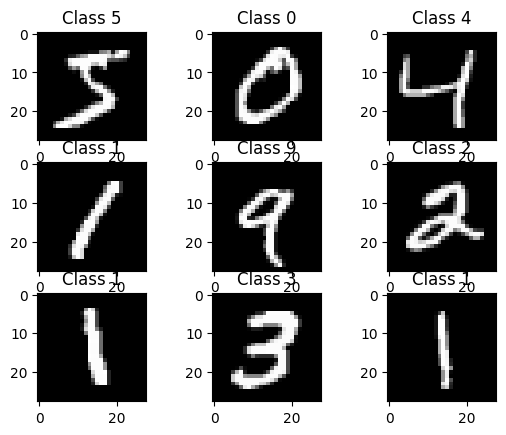

In [3]:
# print(x_train)
# print(y_train)

np.set_printoptions(linewidth=120)
print(x_train[0])
print(y_train[0])

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Class {y_train[i]}")

In [ ]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

n_train_images = x_train.shape[0]
n_test_images = x_test.shape[0]

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [5]:
height = 28
width = 28
depth = 1

# Преобразуем изображения в векторы, изменим формат на float и нормализуем
x_train = x_train.reshape(n_train_images, height * width * depth).astype(np.float32) / 255
x_test = x_test.reshape(n_test_images, height * width * depth).astype(np.float32) / 255

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
n_classes = 10

print(y_train[0:5])

# Закодировать номер выходного класса массивом,
# где под индексом, равным номеру класса,
# стоит единица, а остальные элементы - нули
# (этот формат ещё называют one-hot)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

print(y_train[0:5])

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [7]:
# Построение нейросети

hidden_size = 512  # размер скрытых слоёв

model = keras.Sequential()
model.add(keras.layers.Input(shape=(width * height,)))          # входной слой
model.add(keras.layers.Dense(hidden_size, activation='relu'))   # 1-й скрытый слой (функция активации Rectified Linear Unit заменяет отрицательные значения нулём)
model.add(keras.layers.Dropout(0.2))                            # часть нейронов зануляем рандомно, это поможет от переобучения
model.add(keras.layers.Dense(hidden_size, activation='relu'))   # 2-й скрытый слой
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(hidden_size, activation='relu'))   # 3-й скрытый слой
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(n_classes, activation='softmax'))  # функция softmax преобразует полученные числа в распределение вероятностей (сумма = 1)

In [8]:
# Компиляция модели с заданеим функции потерь и оптимизации
# adam = optimizer=keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
batch_size = 128
n_epochs = 50

save_path = f'checkpoints/test/ckpt_{len(model.layers)}_{hidden_size}' + '_epoch_{epoch:02d}.keras'
save_callback = keras.callbacks.ModelCheckpoint(save_path, verbose=1, monitor='val_accuracy', mode='max', save_best_only=True)

# Обучение модели
model.fit(x_train,
          y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          validation_split=0.1,
          callbacks = [save_callback])

# Сохранение весов в файл
# model.save_weights(f'MLP_{len(model.layers)}_layers_{n_epochs}_epochs_{hidden_size}_hidden_size.weights.h5')

Epoch 1/50
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8456 - loss: 0.4976
Epoch 1: val_accuracy improved from -inf to 0.97100, saving model to checkpoints/test/ckpt_7_512_epoch_01.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8468 - loss: 0.4938 - val_accuracy: 0.9710 - val_loss: 0.0956
Epoch 2/50
413/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9635 - loss: 0.1183
Epoch 2: val_accuracy improved from 0.97100 to 0.97617, saving model to checkpoints/test/ckpt_7_512_epoch_02.keras
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9635 - loss: 0.1183 - val_accuracy: 0.9762 - val_loss: 0.0825
Epoch 3/50
416/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9749 - loss: 0.0809
Epoch 3: val_accuracy did not improve from 0.97617
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9749 - loss: 0.0809 - val_accuracy: 0.9740 - val_loss: 0.0881
Epoch 4/50
420/422 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9779 - loss: 0.0692
Epoch 4: val_accuracy impro

In [12]:
# Оценка точности на тестовом датасете
model = keras.saving.load_model("checkpoints/MLP/ckpt_7_512_epoch_30.keras")
score = model.evaluate(x_test, y_test, verbose=0, return_dict=True)
print(score)

predicted_classes = model.predict(x_test)
correct_count = 0
print("Ошибки:")
for index, image in enumerate(predicted_classes):
    probability = max(image)
    actual_number = np.where(y_test[index] == 1)[0][0]
    prediction = np.where(image == probability)[0][0]
    if actual_number != prediction:
        print(f'Реальное число: {actual_number}, распознанное число: {prediction}, {probability * 100}%')
    else:
        correct_count += 1
print(f'\n{correct_count} из {n_test_images} распознано верно')

{'accuracy': 0.9848999977111816, 'loss': 0.08365918695926666}
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Ошибки:
Реальное число: 4, распознанное число: 2, 99.99710321426392%
Реальное число: 2, распознанное число: 7, 99.58248138427734%
Реальное число: 5, распознанное число: 3, 51.24785900115967%
Реальное число: 3, распознанное число: 7, 99.77599382400513%
Реальное число: 6, распознанное число: 0, 99.99978542327881%
Реальное число: 4, распознанное число: 9, 96.21724486351013%
Реальное число: 3, распознанное число: 5, 98.83034229278564%
Реальное число: 8, распознанное число: 2, 71.04241847991943%
Реальное число: 7, распознанное число: 3, 92.49041676521301%
Реальное число: 8, распознанное число: 2, 99.99985694885254%
Реальное число: 7, распознанное число: 2, 69.03420090675354%
Реальное число: 5, распознанное число: 8, 99.97147917747498%
Реальное число: 9, распознанное число: 4, 54.31092381477356%
Реальное число: 1, распознанное число: 5, 50.63398480415344%
Реальное число: 6, распознанное чис